<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/bozzato/Lab-5/bozzato_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Ordinary differential equations**
**Bozzato Federico**

# **Abstract**

In this lab, we will deepen how to approximate differential equations in order to solve complicate problem such as Newtonìs laws of motion, Einstein's general relativity and many others. 

One typical procedure is to use time stepping methods, which we will see in details in this report.

#**About the code**

**Author:** Federico Bozzato

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt

## Useful functions from previous labs
In this report, I have needed functions implemented in the previous labs: these functions are **```newtonScalarNLeq```** and **```newtonNLsystems```** and their dependencies **```derivative```** and **```jacobian```**. Their implementations are explained [1].

**Observation:** I have modified some little parts in order to bettter suit their use for this lab.

In [0]:
def derivative(fun, h, opt):
  '''
  Calculates the first order derivative of the function @fun at the point @point.
  Parameters:
  - fun: function for which the 1st order derivative is wanted
  - point: point where to calculate the derivative
  Output:
  - derivative: central 1st order derivative
  '''
  ode= opt[0]
  step= opt[1]
  theta= opt[2]
  u0= opt[3]
  t0= opt[4]
  u1= opt[5]
  t1= opt[6]
  f1= fun(ode,step,theta,u0,t0,u1+h,t1)
  f2= fun(ode,step,theta,u0,t0,u1-h,t1)
  
  return (f1 - f2) / (2*h)               # central derivative f'= (f(x+1) - f(x-1))/2



def newtonScalarNLeq(fun, opt, h= 0.1, tol= 1e-5):
  '''
  Solve the scalar nonlinear equation f(x) = 0, where f(x) is the function @fun.
  The method used is Newton's method.
  Parameters:
  - fun: function 
  - point: starting guess for the iteration
  - der (default = None): derivative of the function @fun, calculated manually. 
  - h (default = 0.1): dx used in computing the derivative
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: point x such that f(x)=0
  - residuals: vector containing all the residuals for each iteration
  - iter: number of iterations for reaching the convergence
  '''
  
  ode= opt[0]
  step= opt[1]
  theta= opt[2]
  u0= opt[3]
  t0= opt[4]
  u1= opt[5]
  t1= opt[6]
  
  
  if not callable(fun):
    print('Error: impossible to continue! Parameter @fun is not callable()')
    return None, None
    
  # loop until convergence is not reached
  residuals= []
  x= u1.item()
  res= np.absolute(fun(ode,step,theta,u0,t0,x,t1))
  residuals.append(res)
  k= 1
  while res >= tol and k < 1000:
    alpha= derivative(fun, h, opt)
    
    x= x - fun(ode,step,theta,u0,t0,x,t1)/alpha
    res= np.absolute(fun(ode,step,theta,u0,t0,x,t1))
    residuals.append(res)
    k+= 1
    
  return x, np.array(residuals), k




def jacobian(fun,h,opt):
  '''
  Calculates the Jacobian matrix for the vector function @fun at the point @point.
  Parameters:
  - fun: function for which the Jacobian matrix is wanted
  - point: point where to calculate the Jacobian
  - h (default= 1): incrementation for the derivative
  Output:
  - jacobian: jacobian matrix of the function @fun
  '''
  
  odeSys= opt[0]
  step= opt[1]
  theta= opt[2]
  U0= opt[3]
  T0= opt[4]
  U1= opt[5]
  T1= opt[6]
    
  n= U0.shape[0]
  
  jacobian= np.zeros((n,n))
  for i in range(0,n):
    pp1= [p for p in U1]
    pp2= [p for p in U1]
    
    pp1[i]= pp1[i] + h
    pp2[i]= pp2[i] - h
    
    f1= fun(odeSys,step,theta,U0,T0,pp1,T1)
    f2= fun(odeSys,step,theta,U0,T0,pp2,T1)
    a= ((f1 - f2) / (2*h)).T
    jacobian[:,i]= ((f1 - f2) / (2*h)).T
  
  return jacobian
  
  
  
  
def newtonNLsystems(fun, opt, h=0.1, tol= 1e-5):
  '''
  Solve the vector nonlinear system of equations f(x) = 0, where f(x) is the
  vector function @fun.
  The method used is Newton's method.
  Parameters:
  - fun: vector function 
  - point: starting guess for the iteration
  - J (default= None): the Jacobian matrix of the vector function. It improves
    algorithm performances.
    - h (default = 0.1): dx used in computing the derivative
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: point x such that f(x)=0
  - residuals: vector containing all the residuals for each iteration
  - iter: number of iterations for reaching the convergence
  '''
  if not callable(fun):
    print('Error: impossible to continue! Parameter @fun is not callable()')
    return None, None

  
  odeSys= opt[0]
  step= opt[1]
  theta= opt[2]
  U0= opt[3]
  T0= opt[4]
  U1= opt[5]
  T1= opt[6]
  
  x= U0
  k = 1
  residuals= []
  res= linalg.norm(fun(odeSys,step,theta,U0,T0,x,T1))
  residuals.append(res)
  while res >= tol and k < 1000:                         # res= |f(x)|
    jac= jacobian(fun,h,opt)
    
    b= - fun(odeSys,step,theta,U0,T0,x,T1)
    dx, _, _, _ = linalg.lstsq(jac, b, rcond=None)       # built-in function
    x = x + dx                    
    res= linalg.norm(fun(odeSys,step,theta,U0,T0,x,T1))
    residuals.append(res)
    k+= 1
    
  return x, np.array(residuals), k

# **Introduction**

A differential equation is a mathematical equation that relates some function with its derivatives. In applications, the function usually represent physical quantities, the derivatives represent their rates of change, and the equation defines the relationship between the two [2].

There exist many type of differential equations, but we will focus only on ODEs, that are *ordinary differential equations*.

Contrary to the previous labs, this lab is divided into two part: the Mandatory assignment, where the methods are presented and tested with mathematical problems, and the Extra assignment, where it is shown how to use ODEs in a very common model, that is *prey-predator model*.



#Mandatory assignment

##Methods

###1. Time stepping for scalar initial value problem $du/dt= f(u,t)$

Given the ordinary differential equation 

>$
\dot{u}(t)=f(u(t),t)
$

where $u: [0,T]\to\mathbb{R}$ and $f:\mathbb{R}\times\mathbb{R}^+\to\mathbb{R}$, we refer to this problem with the name of *scalar initial value problem* [2].

####Implementation
There exists many methods for solving the scalar initial value problem, but we will study only the time stepping methods, which consist of using numerical methods over the discretized interval of time $[0,T]$.

The implementation presented in the below cells is called $\theta$-method, where depending on the parameter $\theta$ it is possible to use three different time stepping method:
* if $\theta = 1$ we obtain the explicit Euler method
* if $\theta = 0$ we obtain the implicit Euler method
* if $\theta = 0.5$ we obtain the trapezoidal rule

Below there is the pseudocode taken from [4]:


```
U(0) = u0
for n = 1, 2, ..., N do:
  U(n) = U(n-1) + k_n * ((1-theta)*f(U(n),t(n)) + theta*f(U(n-1),t(n-1)))
end
```

where ```k_n``` is the time step at the $n$-th iteration. 

As we can see, for both the implicit Euler method and the trapezoidal method we need to solve the algebrac equation

>$
x= U_{n-1} + k_n\left( \left(\left(1-\theta\right)f(x,t_n)  + \theta f(U_{n-1},t_{n-1})\right)\right)
$

while for the explicit Euler method, each iteration depends only on the last iteration. 

In order to solve the last equation, we can rewrite it as

>$
 g(x)= 0
$

where 

>$
 g(x)= U_{n-1} + k_n\left( \left(\left(1-\theta\right)f(x,t_n)  + \theta f(U_{n-1},t_{n-1})\right)\right)- x
$

It is possible to solve the equation with many methods, but the one that has been used is the Newton's method for nonlinear equations [1,5].

In [0]:
def odeSolver(T, odeFun, theta, u0, N):
  '''
  Solves the ordinary differential equation @odeFun given in input, for t in 
  range(0,T+step), where step is the ratio between the number of intervals N and 
  the final time T.
  Parameters:
  - T: final time T
  - odeFun: ODE to be solved
  - theta: parameter used for choosing the method to solve the ODE. (theta = 0 
    is implicit Euler, theta = 1 is explicit Euler, theta = 0.5 trapezoidal rule)
  - u0: initial value (initial conditions for the ODE)
  - N: number of subintervals dividing the interval [0,T]
  Output:
  - t: discrited vector of time
  - U: function u solving the ODE @odeFun
  '''
  
  def stepFunction(ode,step,theta,u0,t0,u1,t1):
    '''
    Defines the function
    
        g(x) = U[n-1] + k_n * ((1-theta) * f(U[n],t[n]) + theta * f(U[n-1],t[n-1])) - x
    
    explained in the above cell. 
    
    '''
    g= u0 + step*((1-theta) * ode(u1,t1) + theta * odeFun(u0,t0)) - u1
   
    return g
  
  step= T/N
  t= np.arange(0, T+step, step)
  
  U= np.zeros((len(t),1))
  U[0]= u0
  
  for i in range(1,len(t)): 
    opt= [0 for _ in range(0,7)]
    opt[0]= odeFun
    opt[1]= step
    opt[2]= theta
    opt[3]= U[i-1][0]
    opt[4]= t[i-1]
    opt[5]= U[i-1][0]
    opt[6]= t[i]
    if theta != 1:
      U[i]= newtonScalarNLeq(stepFunction, opt, h= 0.1, tol= 1e-5)[0]
    else:
      U[i]= U[i-1] + step * odeFun(U[i-1],t[i-1]) 
  
  return t, U

###2. Time stepping for system of initial value problem $du/dt = f(u,t)$

In the previous paragraph, we have explained how to solve one ordinary differential equation with the time stepping method, but is it possible to use the same methods also for systems of ODEs? The answer is obviously affermative and the code for solving systems of ODEs is very similar to the one we explained in the previous paragraph.

As we can see from the below cell, the only difference is to handle vectors and matrices instead of scalars.

In [0]:
def systemOdeSolver(T, odeSystem, theta, u0, N):
  '''
  Solves the system of ODEs @odeSystem given in input, for t in range(0,T+step), 
  where step is the ratio between the number of intervals N and the final time T.
  Parameters:
  - T: final time T
  - odeSystem: system of ODEs to be solved
  - theta: parameter used for choosing the method to solve the ODE. (theta = 0 
    is implicit Euler, theta = 1 is explicit Euler, theta = 0.5 trapezoidal rule)
  - u0: initial value (initial conditions for the ODE)
  - N: number of subintervals dividing the interval [0,T]
  Output:
  - t: discritized vector of time
  - U: vector of functions u solving the system @odeSystem
  '''

  def stepFunction(odeSys,step,theta,u0,t0,u1,t1):
    s= (step*((1-theta) * odeSys(u1,t1) + theta * odeSys(u0,t0))).flatten()
    g= u0 + s - u1
    
    return g
  
  
  if not isinstance(u0,np.ndarray):
    u0= np.array(u0)
  
  
  step= T/N
  t= np.arange(0, T+step, step)
  U= np.zeros((u0.shape[0],t.shape[0]))
  U[:,0]= u0
  
  for i in range(1,len(t)):
    opt= [0 for _ in range(0,7)]
    opt[0]= odeSystem
    opt[1]= step
    opt[2]= theta
    opt[3]= U[:,i-1]
    opt[4]= t[i-1]
    opt[5]= U[:,i-1]
    opt[6]= t[i]
    if theta != 1:
      U[:,i]= newtonNLsystems(stepFunction, opt, h= 0.1, tol= 1e-5)[0]
    else:
      U[:,i]= U[:,i-1] + step * odeSystem(U[:,i-1],t[i-1]).flatten()
    
  return t, U
 

##Results
Results of the tests done on the two above functions are shown in the following cells, where we can compare the use of the three different methods (implicit and explicit Euler method and trapezoidal rule). 

Moreover I have compared each method in term of MSE (mean squared error) in based on the number of subintervals taken for the discritization of the time domain. Almost all the trials are done within a time range of $[0,10]$ and with a number of subintervals in the range $[1,40]$.


In [0]:
def analysis1D(anFun, apprFun, u0, T, Nmax, nTrials):
  
  theta = [1, 0, 0.5]
  
  for th in theta:
    MSE= []
    
    for i in range(0,nTrials):
      N= Nmax/nTrials*(i+1)
      x, y= odeSolver(T,apprFun,th,u0,N)
      
      y=y.flatten()
      y_true= np.array(anFun(x))
      res= np.abs(y - y_true)**2
      mse= sum(res)/y.shape[0]

      MSE.append([N, np.log10(mse)])  
      
    MSE= np.array(MSE)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(x,y,'--')
    plt.plot(x,y_true)
    plt.title('Approximated solution vs analitical solution')
    plt.xlabel('time')
    plt.ylabel('u(t)')
    
    plt.subplot(1,2,2)
    plt.plot(MSE[:,0],MSE[:,1],'-o')
    plt.title('MSE with theta={}'.format(th))
    plt.xlabel('number of intervals')
    plt.ylabel('log10(MSE)')
    
    
  
  plt.show()


def analysisND(anFun, apprFun, u0, T, Nmax, nTrials):
  
  theta = [1, 0, 0.5]
  
  for th in theta:
    MSE= []
    x_res= []
    for i in range(0,nTrials):
      N= Nmax/nTrials*(i+1)
      x_res.append(N)
      x, y= systemOdeSolver(T,apprFun,th,u0,N)
      
      y_true= np.array(anFun(x))
      res= np.abs(y - y_true)**2
      mse= (np.sum(res,axis=1)/y.shape[0]).T
      MSE.append(np.log10(mse))
       
    MSE= np.array(MSE)
    
    plt.figure()
    plt.plot(x,y.T,'--')
    plt.plot(x,y_true.T)
    plt.title('Approximated solution vs analitical solution')
    st= []
    for k in range(1,len(u0)+1):
      st.append('approximated x{}'.format(k))
    for k in range(1,len(u0)+1):
      st.append('analytical x{}'.format(k))
      
    plt.xlabel('time')
    plt.ylabel('u(t)')
    plt.legend(st)
    
    plt.figure()
    plt.plot(x_res,MSE,'-o')
    plt.title('MSE with theta={}'.format(th))
    plt.xlabel('number of intervals')
    plt.ylabel('log10(MSE)')
    plt.legend(['x{}'.format(k) for k in range(1,len(u0)+1)])
  
  plt.show()


def printOutput(t, estU, U):
  
  if estU.shape[1] == 1:
    estU = estU.flatten()
    
  if not isinstance(U,np.ndarray):
    U= np.array(U)
  
  res= estU - U

  plt.figure()
  plt.plot(t,estU,'--')
  plt.plot(t,U)
  plt.xlabel('Time')
  plt.ylabel('Function')
  plt.legend(('Approximate solution','Analytical solution'))
  plt.show()
  
  plt.figure()
  plt.plot(t,res,'-o')
  plt.xlabel('Time')
  plt.ylabel('Residuals')
  plt.show()

###1. Time stepping for scalar initial value problem $du/dt = f(u,t)$

In order to test the function **```odeSolver```**, I have used the following equations:

1. $\dot{u}(t)=-u(t)\cos{t}$ with $u(0)=1$. The solution is $u(t)=e^{-\sin{t}}$.
2. $\dot{u}(t)=\dfrac{1}{u(t)(t+1)}$ with $u(0)=1$. The solution is $u(t)=\sqrt{2\log{(t+1)}+1}$
3. $\dot{u}(t)=-u^2$ with $u(0)=5$. The solution is $u(t)=\dfrac{5}{5t+1}$

-----------------------------------------------------------------------
------------------------- ODE n° 1 ------------------------------------
-----------------------------------------------------------------------


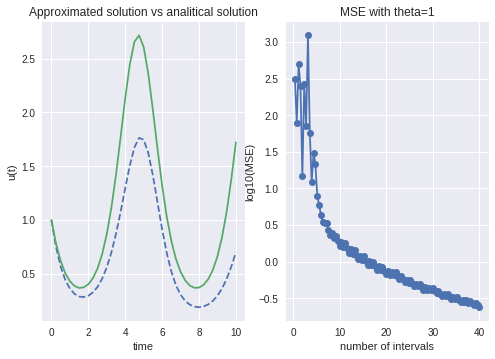

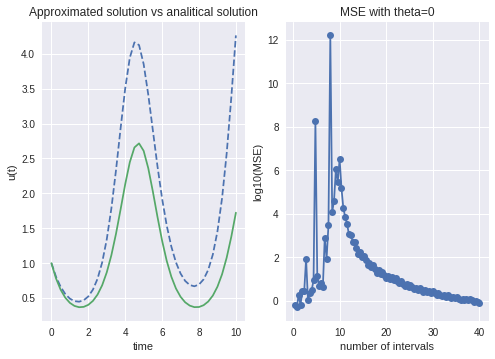

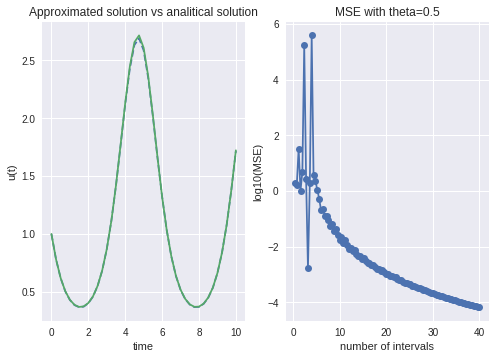

-----------------------------------------------------------------------
------------------------- ODE n° 2 ------------------------------------
-----------------------------------------------------------------------


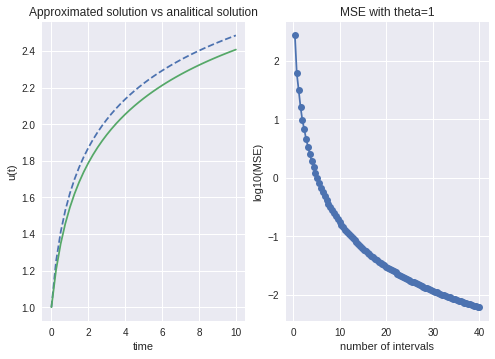

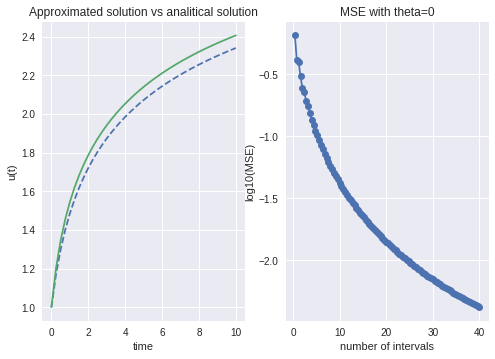

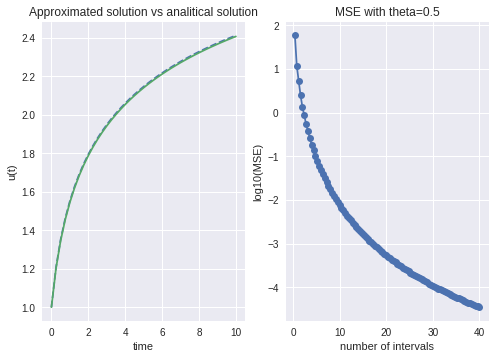

-----------------------------------------------------------------------
------------------------- ODE n° 3 ------------------------------------
-----------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


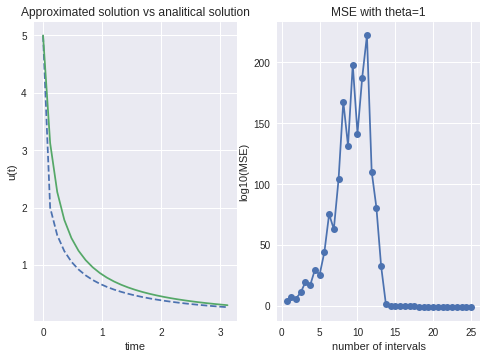

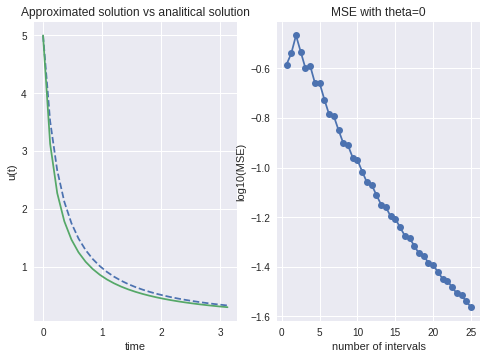

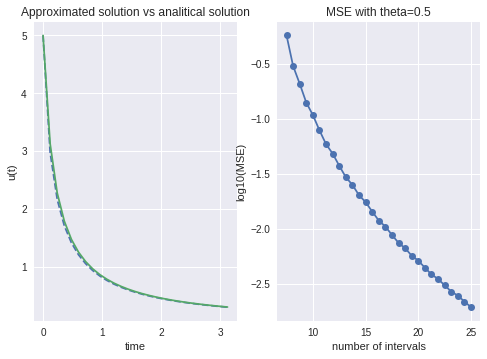

In [7]:
print('-----------------------------------------------------------------------')
print('------------------------- ODE n° 1 ------------------------------------')
print('-----------------------------------------------------------------------')

def fun(t):
  return np.e**(-np.sin(t))

def odeFun(u,t):
  return -u*np.cos(t)
    

u0= 1
T= 10
Nmax= 40
nTrials= 100

analysis1D(fun, odeFun, u0, T, Nmax, nTrials)


print('-----------------------------------------------------------------------')
print('------------------------- ODE n° 2 ------------------------------------')
print('-----------------------------------------------------------------------')


def odeFun(u,t):
  return 1/(u*(t+1))

def fun(t):
  return np.sqrt(2*np.log(t+1)+1)

u0= 1
T= 10
Nmax= 40
nTrials= 100

analysis1D(fun, odeFun, u0, T, Nmax, nTrials)

print('-----------------------------------------------------------------------')
print('------------------------- ODE n° 3 ------------------------------------')
print('-----------------------------------------------------------------------')

def odeFun(u,t):
  return -u**2

def fun(t):
  return 5/(5*t+1)

u0= 5
T= 3
Nmax= 25
nTrials= 40

analysis1D(fun, odeFun, u0, T, Nmax, nTrials)



###2. Time stepping for system of initial value problems $du/dt = f(u,t)

In order to test the function **```systemOdeSolver```**, I have used the following systems:

1. $\begin{cases}
\dot{x}_1 = 3x_1 + t \\
\dot{x}_2 = x_2 +1 \\
\dot{x}_3 = x_2 + x_3
\end{cases}
$ with $\vec{x}(0)=\begin{pmatrix}
0 & 0 & 0\end{pmatrix}^T$. The solution is $\begin{cases}
  x_1= \dfrac{1}{9} e^{3t} - \dfrac{1}{3}t - \dfrac{1}{9} \\
  x_2= e^t -1 \\
  x_3= (t-1)e^t +1
\end{cases}$

2. $\begin{cases}
\dot{x}_1= 6x_1 + 5x_2 + e^{2t} \\
\dot{x}_2= x_1 + 2x_2 +2e^{2t}
\end{cases}$ with $\vec{x}(0)= \begin{pmatrix}
0 & 0 
\end{pmatrix}$. The solution is $\begin{cases}
  x_1= \dfrac{1}{3}e^{t}(5e^{6t}+1) - \dfrac{7}{6}e^t(e^{6t}-1)-2e^t \\
  x_2= \dfrac{1}{3}e^{t}(e^{6t}-1) - \dfrac{7}{30}e^t(e^{6t}+5)+\dfrac{7}{5}e^{2t} 
\end{cases}$

-----------------------------------------------------------------------
------------------------ SYSTEM n° 1 ----------------------------------
-----------------------------------------------------------------------
(100, 3)
(100, 3)
(100, 3)


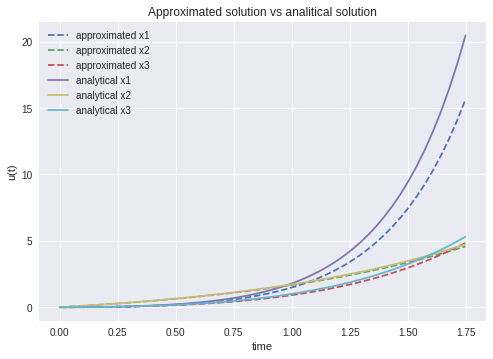

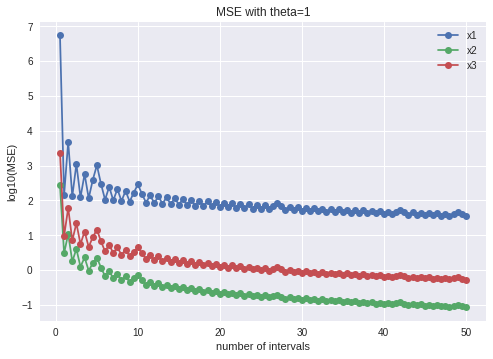

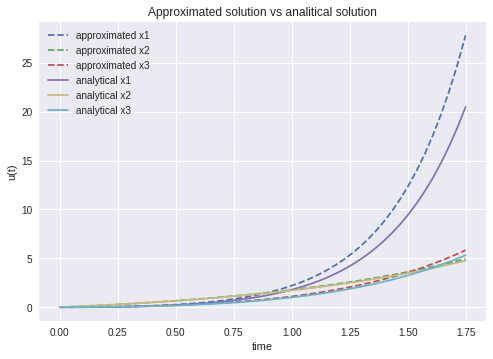

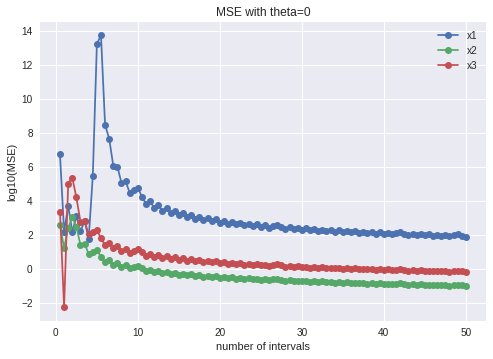

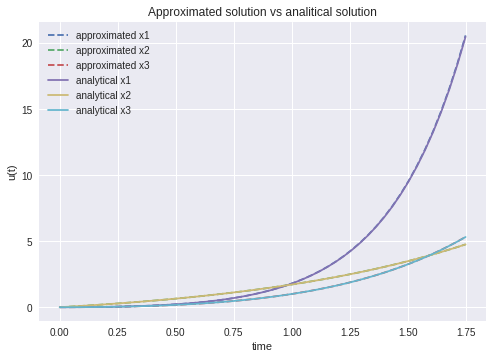

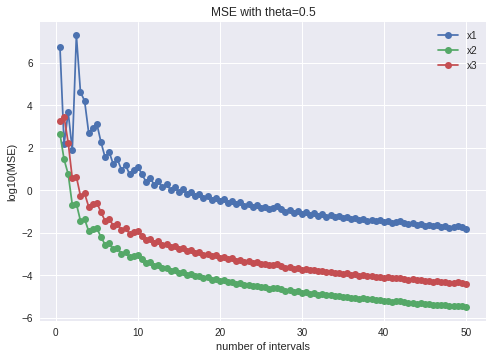

-----------------------------------------------------------------------
------------------------ SYSTEM n° 2 ----------------------------------
-----------------------------------------------------------------------


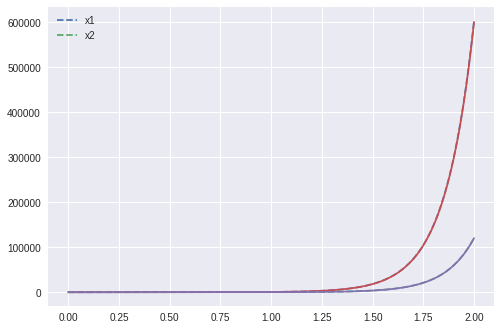

In [66]:
#https://math.mit.edu/~jorloff/suppnotes/suppnotes03/1803SupplementaryNotes_full.pdf

print('-----------------------------------------------------------------------')
print('------------------------ SYSTEM n° 1 ----------------------------------')
print('-----------------------------------------------------------------------')

def systemOdeFun(varVect,t):
  x1= varVect[0]
  x2= varVect[1]
  x3= varVect[2]
  fun1= 3*x1 + t
  fun2= x2 + 1
  fun3= x2 + x3
  
  vect= np.array( [[fun1],
                   [fun2],
                   [fun3]] )
  
  return vect

def systemFun(t):
  x1= (1/9)*np.e**(3*t) - (1/3)*t - (1/9)
  x2= np.e**t - 1
  x3= (t-1)*np.e**t + 1
  
  return x1, x2, x3

U0= [0, 0, 0]
T= 1.75
Nmax= 50
nTrials= 100 
analysisND(systemFun, systemOdeFun, U0, T, Nmax, nTrials)
#x,U= systemOdeSolver(1.75, systemOdeFun, 1, U0, 200)

#U1, U2, U3= systemFun(x)


#plt.figure()
#plt.plot(x,U[0,:], '--')
#plt.plot(x,U[1,:], '--')
#plt.plot(x,U[2,:], '--')
#plt.plot(x,U1)
#plt.plot(x,U2)
#plt.plot(x,U3)

#plt.legend(['x1', 'x2', 'x3'])
#plt.show()


print('-----------------------------------------------------------------------')
print('------------------------ SYSTEM n° 2 ----------------------------------')
print('-----------------------------------------------------------------------')

def systemOdeFun(varVect,t):
  x1= varVect[0]
  x2= varVect[1]
  
  fun1= 6*x1 + 5*x2 + np.e**(2*t)
  fun2= x1 + 2*x2 + 2*np.e**(2*t)
  
  vect= np.array( [[fun1],
                   [fun2]] )
  
  return vect

def systemFun(t):
  x1= (1/3)*np.e**t*(5*np.e**(6*t)+1) - (7/6)*np.e**t*(np.e**(6*t)-1) - 2*np.e**(2*t)
  x2= (1/3)*np.e**t*(np.e**(6*t)-1) - (7/30)*np.e**t*(np.e**(6*t)+5)  + (7*np.e**(2*t))/5
  
  return x1, x2

U0= [0, 0]
x,U= systemOdeSolver(2, systemOdeFun, 0.5, U0, 200)

U1, U2= systemFun(x)


plt.figure()
plt.plot(x,U[0,:], '--')
plt.plot(x,U[1,:], '--')
plt.plot(x,U1)
plt.plot(x,U2)

plt.legend(['x1', 'x2'])
plt.show()
  

##Discussion

Summarize your results and your conclusions. Were the results expected or surprising. Do your results have implications outside the particular problem investigated in this report? 

##References

[1] from *[Lab 3: Iterative methods](https://github.com/johanhoffman/DD2363-VT19/blob/bozzato/Lab-3/bozzato_lab3.ipynb)*

[2] from Wikipedia, *[Differential equation](https://en.wikipedia.org/wiki/Differential_equation)*

[3] from Lecture Notes, *Time stepping methods, chapter 14*, pg. 179

[4] from Lecture Notes, *The $\theta$-method, chapter 14*, pg. 184

[5] from Lecture Notes, *Newton's method, chapter 8*, pg. 116



#Extra assignment

##Introduction

##Method

$
\begin{cases}
  \dfrac{dP}{dt} = bP - k_1PZ \qquad [\text{preys}]\\
  \dfrac{dZ}{dt}= k_2PZ - mZ - k_3Z^2 \qquad [\text{predators}]
\end{cases}
$

where:
* $b=1.0$
* $m= 0.5$
* $k_1= 0.1$
* $k_2= 0.01$
* $k_3= 0$

Starting point $P(0)= 80$ and $Z(0)=0$

Populations never become less than 1

In [0]:
#https://people.ucsc.edu/~ammoore/migrated/ocea286/EXERCISES/exercise1.pdf

def system1(varVect,t):
  b= 1
  m= 0.5
  k1= 0.1
  k2= 0.01
  k3= 0
  
  P= varVect[0]
  Z= varVect[1]
  
  f1= b*P - k1*P*Z
  f2= k2*P*Z - m*Z - k3*Z**2
  
  sys= np.array( [[f1],
                  [f2]] )
  
  return sys

##Results

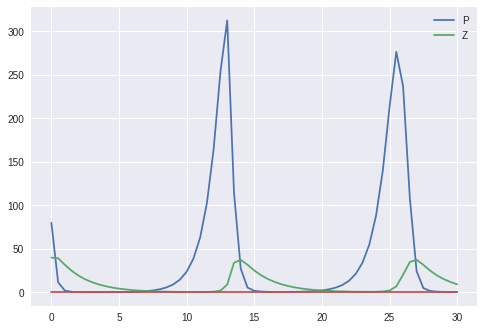

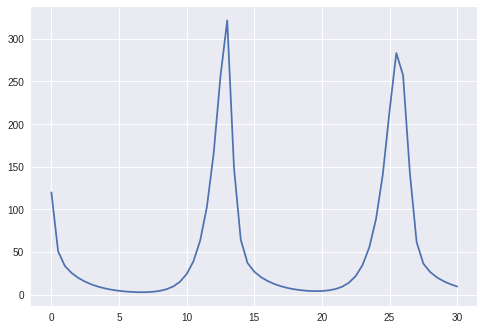

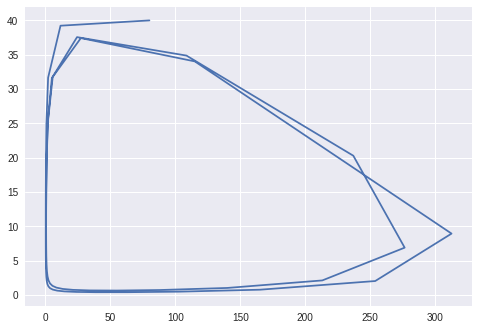

In [10]:
P0= 80
Z0= 40
T= 30
N= 60

t, X= systemOdeSolver(T, system1, 0.5, [P0, Z0], N)

#U1, U2= systemFun(x)


plt.figure()
plt.plot(t,X[0,:])
plt.plot(t,X[1,:])
plt.plot(t, np.ones_like(t))
plt.legend(['P', 'Z'])

plt.figure()
plt.plot(t, X[0,:]+X[1,:])

plt.figure()
plt.plot(X[0,:],X[1,:])



plt.show()

##Discussion